In [78]:
import iris 
import matplotlib.pyplot as plt
import iris.coord_categorisation
import numpy as np
import cartopy as cart
import os
import pandas as pd
import cartopy as cart
import glob
from matplotlib import gridspec

In [79]:
#--------------------------------------------------------------------------
# LOAD DATAFRAMES
#--------------------------------------------------------------------------

os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\figure_making\\output_files\\')

site_info = pd.read_csv('station_info.csv')

site = pd.read_csv('annual_DOR_site.csv')
UKESM = pd.read_csv('annual_DOR_UKESM.csv')

#-------------tidy dataframes--------------------------------------------

site.rename(columns={'climatology':'mean_site', 'std':'std_site', 'std_monthly':'std_month_site'}, inplace=True)
UKESM.rename(columns={'Ozone_avg':'mean_UKESM', 'std':'std_UKESM', 'std_monthly':'std_month_UKESM'}, inplace=True)

In [80]:
#--------------------------------------------------------------------------
# MERGE ALL SITES AND ADD NAMES
#--------------------------------------------------------------------------


locs = site_info[['item', 'name']].drop_duplicates()

site_names = pd.merge(site, locs, on=['item'])
UKESM_names = pd.merge(UKESM, locs, on=['item'])

full_data = pd.merge(site_names, UKESM_names, on=['item'])

n = len(site_names)

#-------------tidy dataframes--------------------------------------------

full_data.drop(columns={'name_x'}, inplace=True)

full_data.columns

Index(['item', 'mean_site', 'std_month_site', 'std_site', 'UKESM_Lat',
       'UKESM_Lon', 'index_Lat', 'index_Lon', 'Unnamed: 0', 'mean_UKESM',
       'std_UKESM', 'name_y'],
      dtype='object')

In [81]:
#--------------------------------------------------------------------------
# MEAN BY NAME
#--------------------------------------------------------------------------

full_mean = full_data.groupby('name_y').mean().reset_index()

full_mean['bias'] = full_mean['mean_site'] -  full_mean['mean_UKESM']

In [82]:
chosen_data = full_mean[(full_mean['name_y'] != 'Mt. Kenya') & (full_mean['name_y'] != 'Tanah Rata')]
m = len(chosen_data)

In [83]:
chosen_data['fig_order'] = [2,9,5,4,7,13,12,8,1,10,3,11,6]
chosen_data.sort_values(by='fig_order', inplace=True)

chosen_data.iloc[-3,0] = r'S$\tilde\mathrm{a}$o Paulo'
chosen_data.iloc[8,0] = r'Bogot$\acute\mathrm{a}$'

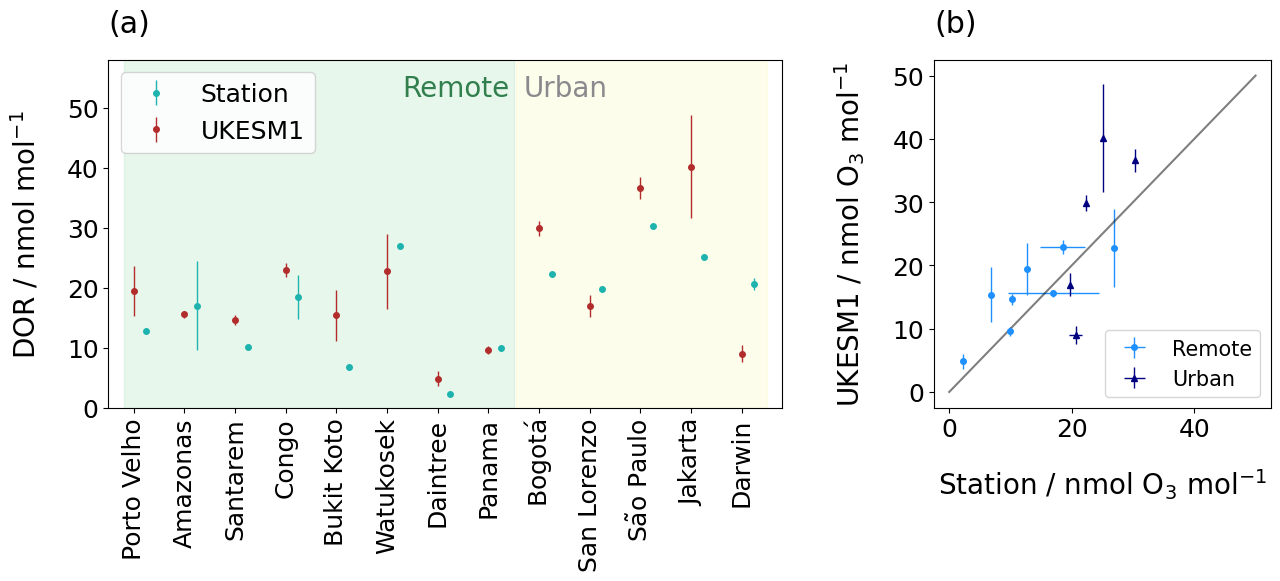

In [87]:
plt.figure(figsize=(15,6))

gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 

plt.rcParams['font.size']=18

plt.subplot(gs[0])
plt.errorbar(np.linspace(0.25,m-1+0.25,m), chosen_data['mean_site'].values, yerr=chosen_data['std_site'].values,
                 elinewidth = 1,  marker =  'o', markersize = 4, linestyle = '', color=[0.1157, 0.7022, 0.6843], label='Station')
        
plt.errorbar(range(m), chosen_data['mean_UKESM'].values, yerr=chosen_data['std_UKESM'].values,
                 elinewidth = 1,  marker =  'o', markersize = 4, linestyle = '', color=[0.6980, 0.1725, 0.1725], label='UKESM1')

plt.ylabel('DOR / nmol mol$^{-1}$', labelpad = 18, fontsize=20)
plt.xticks(range(m), chosen_data['name_y'].values, rotation=90)
plt.legend(loc='upper left')
plt.xlim(-0.5,12.8)
plt.ylim(0,58)

plt.subplots_adjust(bottom=0.3)

plt.fill_between([-0.2,7.5],[60,60], color=[ 0.141, 0.69647, 0.2980], alpha = 0.1)
plt.fill_between([7.55,12.5],[60,60], color=[ 0.9451, 0.9373, 0.2510], alpha = 0.1)

plt.text(7.7,52,'Urban', color=[ 0.5451, 0.5373, 0.5510], fontsize=20)
plt.text(5.3,52,'Remote', color=[ 0.1941, 0.49647, 0.2980 ], fontsize=20)

plt.title('(a)', loc='left', pad = 20)

plt.subplot(gs[1])

plt.errorbar(chosen_data['mean_site'].values[0:8], chosen_data['mean_UKESM'].values[0:8], 
                 xerr=chosen_data['std_site'].values[0:8], yerr=chosen_data['std_UKESM'].values[0:8],
                 elinewidth = 1,  marker =  'o', markersize = 4, color='dodgerblue', linestyle = '', label = 'Remote')
    
plt.errorbar(chosen_data['mean_site'].values[8:13], chosen_data['mean_UKESM'].values[8:13],
                 xerr=chosen_data['std_site'].values[8:13], yerr=chosen_data['std_UKESM'].values[8:13],
                 elinewidth = 1,  marker =  '^', markersize = 5, color='navy', linestyle = '', label = 'Urban')

plt.xlabel('Station / nmol O$_3$ mol$^{-1}$', labelpad = 18, fontsize=20)
plt.ylabel('UKESM1 / nmol O$_3$ mol$^{-1}$', labelpad = 18, fontsize=20)
plt.legend(loc='lower right', fontsize = 15)

plt.plot([0,50], [0,50], 'k', alpha = 0.5)

plt.title('(b)', loc='left', pad = 20)

plt.subplots_adjust(wspace=0.3)

plt.savefig('figures/annual_DOR.png', dpi=300)

In [44]:
colors = ['darkred', 'tomato', 'red', 'dodgerblue', 'darkorchid','slateblue', 'olivedrab', 'fuchsia', 'peru', 'saddlebrown', 'darkorange','navy', 'yellowgreen']

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\matplotlib\axes\_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\matplotlib\axes\_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


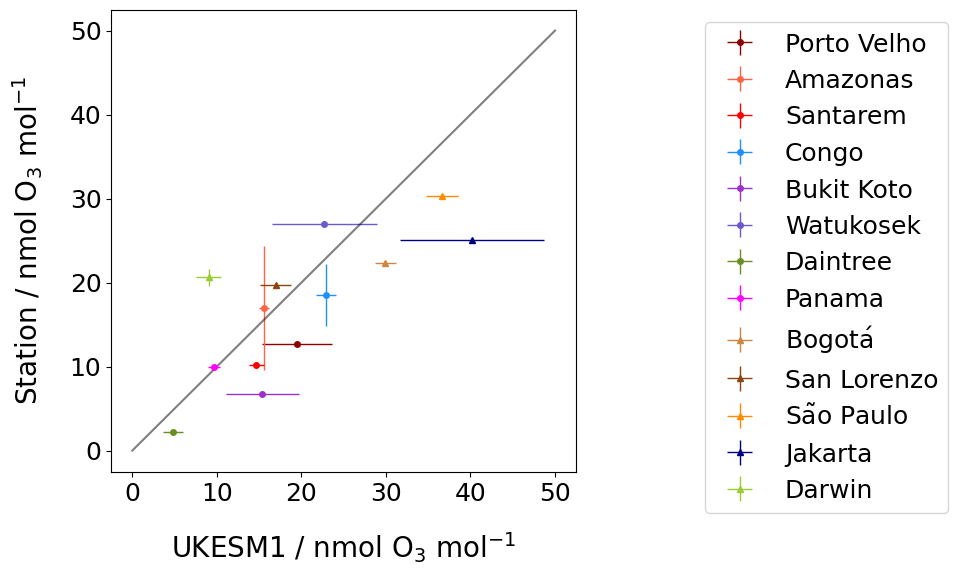

In [45]:
plt.figure(figsize=(6,6))

plt.rcParams['font.size']=18

for i in range(8):

    plt.errorbar(chosen_data['mean_UKESM'].values[i],  chosen_data['mean_site'].values[i],
                 yerr=chosen_data['std_site'].values[i], xerr=chosen_data['std_UKESM'].values[i],
                 elinewidth = 1,  marker =  'o', markersize = 4, color=colors[i], linestyle = '', label = chosen_data['name_y'].values[i])
    
for i in range(8,13):

    plt.errorbar(chosen_data['mean_UKESM'].values[i],  chosen_data['mean_site'].values[i],
                 yerr=chosen_data['std_site'].values[i], xerr=chosen_data['std_UKESM'].values[i],
                 elinewidth = 1,  marker =  '^', markersize = 5, color=colors[i], linestyle = '', label = chosen_data['name_y'].values[i])

    
m, c = np.polyfit(chosen_data['mean_UKESM'].values,  chosen_data['mean_site'].values, 1)


plt.ylabel('Station / nmol O$_3$ mol$^{-1}$', labelpad = 18, fontsize=20)
plt.xlabel('UKESM1 / nmol O$_3$ mol$^{-1}$', labelpad = 18, fontsize=20)
plt.legend(bbox_to_anchor = [1.25,1])

plt.plot([0,50], [0,50], 'k', alpha = 0.5)
#plt.plot([0,50], [0,50*m+c], 'k--', alpha = 0.5)

#plt.savefig('annual_DOR_corr.png', dpi=300, bbox_inches='tight')

In [48]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(chosen_data['mean_UKESM'].values, chosen_data['mean_site'].values)

7.089972775611519

In [63]:
## range of observed DOR
print(np.mean(chosen_data['mean_site'].values))
print(np.min(chosen_data['mean_site'].values))
print(np.max(chosen_data['mean_site'].values))

17.10402047325641
2.237197389
30.290936000000002


In [55]:
total_bias = np.mean(chosen_data['mean_site'].values - chosen_data['mean_UKESM'].values)
total_bias

-2.7340791652051277

In [64]:
## urban v rural

urban = chosen_data.iloc[8::]
rural = chosen_data.iloc[0:8]

print(rmse(rural['mean_UKESM'].values, rural['mean_site'].values))

print('rural: ',np.mean(rural['bias'].values))
print('urban: ',np.mean(urban['bias'].values))



4.829522599904026
rural:  -2.617059733875
urban:  -2.9213102553333314


-0.20075364209100158

In [65]:
## relative bias

print(total_bias/np.mean(chosen_data['mean_site'].values))

np.mean(rural['bias'].values)/np.mean(rural['mean_site'].values)

-0.15985008726340647


-0.20075364209100158

In [54]:
## regional

SEAS = full_mean.iloc[[2,6,12],:]
AF = full_mean.iloc[3,:]
AUS =  full_mean.iloc[[4,5],:]
PAN = full_mean.iloc[7,:]
SAM = full_mean.iloc[[0,1,8,9,1,11],:]

rest = full_mean.iloc[[0,1,3,4,5,7,8,9,10,11],:]

In [57]:
max_bias = np.min(chosen_data['mean_site'].values - chosen_data['mean_UKESM'].values)
max_bias_rest = np.min(rest['mean_site'].values - rest['mean_UKESM'].values)
min_bias = np.max(chosen_data['mean_site'].values - chosen_data['mean_UKESM'].values)

print('min: ', min_bias)
print('max: ', max_bias)
print('max rest: ', max_bias_rest)

min:  11.579830830000002
max:  -15.071011679999998
max rest:  -7.601115536666665


In [58]:
SEAS_bias = np.mean(SEAS['mean_site'].values - SEAS['mean_UKESM'].values)
print('SEAS bias: ', SEAS_bias)   

AF_bias = np.mean(AF['mean_site'] - AF['mean_UKESM'])
print('AF bias: ', AF_bias)

AUS_bias = np.mean(AUS['mean_site'].values - AUS['mean_UKESM'].values)
print('AUS bias: ', AUS_bias)

SAM_bias = np.mean(SAM['mean_site'].values - SAM['mean_UKESM'].values)
print('SAM bias: ', SAM_bias) 

PAN_bias = np.mean(PAN['mean_site'] - PAN['mean_UKESM'])
print('PAN bias: ', PAN_bias) 

rest_bias = np.mean(rest['mean_site'].values - rest['mean_UKESM'].values)
print('rest bias: ', rest_bias) 

SEAS bias:  -6.494919988333333
AF bias:  -4.40017486
AUS bias:  4.486621459500001
SAM bias:  -4.007093048888888
PAN bias:  0.30354425500000026
rest bias:  -1.6058269182666656


In [66]:
from scipy import stats

In [67]:
r_sq = stats.pearsonr(rest['mean_site'].values, rest['mean_UKESM'].values)
print('r2: ', r_sq[0]**2)
print('p: ', r_sq[1])

r_sq_all = stats.pearsonr(chosen_data['mean_site'].values, chosen_data['mean_UKESM'].values)
print('r2 all: ', r_sq_all[0]**2)
print('p all: ', r_sq_all[1])

r2:  0.6403187420591784
p:  0.005435697753780516
r2 all:  0.5834382373129529
p all:  0.0023718338475979257


In [68]:
stats.ttest_ind(rest['bias'].values, SEAS['bias'].values)

Ttest_indResult(statistic=1.1003564764875935, pvalue=0.2946738076909716)

In [69]:
stats.ttest_ind(rural['bias'].values, urban['bias'])

Ttest_indResult(statistic=0.07506570497843261, pvalue=0.9415102087899643)